In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import mean_squared_error

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Neural Network

In [2]:
st = StandardScaler()
scaled_X_train = st.fit_transform(X_train)

# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 4ms/step - loss: 101.4241 - mean_squared_error: 101.4241 - val_loss: 54.7727 - val_mean_squared_error: 54.7727
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 18.3514 - mean_squared_error: 18.3514 - val_loss: 0.1716 - val_mean_squared_error: 0.1716
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1838 - mean_squared_error: 0.1838 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1611 - mean_squared_error: 0.1611 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1567 - mean_squared_error: 0.1567 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1473 - mean_squared_error: 0.1473 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 7/500
59/59 [=======

Training MSE: 7.523265958297998e-05
Validation MSE: 0.015626797452569008


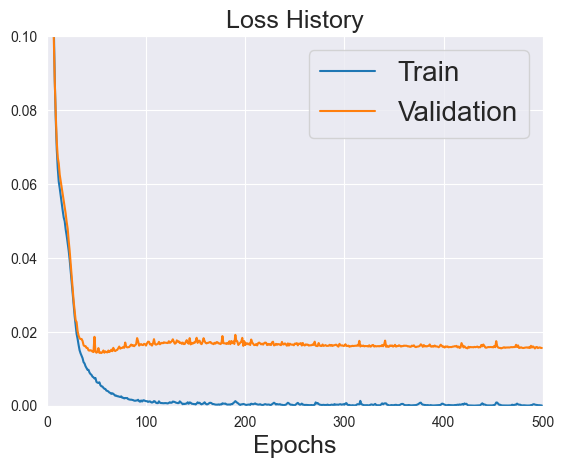

In [3]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 0.1])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [4]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 726us/step


In [5]:
scaled_X_test = st.transform(X_test)
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 778us/step


In [6]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 140026865.883
Test MSE: 698873891.105


Text(0, 0.5, 'Sale_Price')

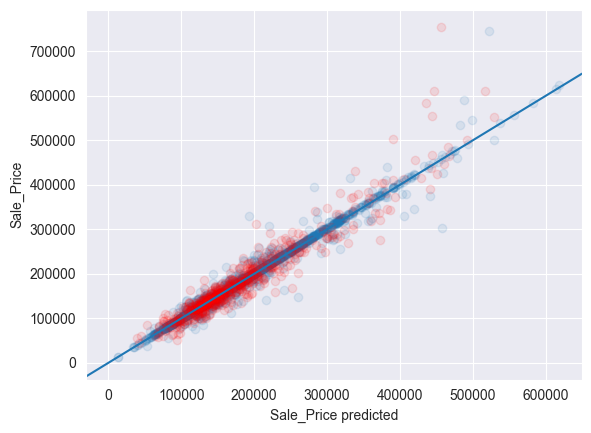

In [7]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre l'overfitting aggiungendo dei Dropout layer

In [8]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 0s 3ms/step - loss: 110.2505 - mean_squared_error: 110.2505 - val_loss: 69.9211 - val_mean_squared_error: 69.9211
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 40.6272 - mean_squared_error: 40.6272 - val_loss: 5.3438 - val_mean_squared_error: 5.3438
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 19.4830 - mean_squared_error: 19.4830 - val_loss: 2.1159 - val_mean_squared_error: 2.1159
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 16.6068 - mean_squared_error: 16.6068 - val_loss: 1.9224 - val_mean_squared_error: 1.9224
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 15.6319 - mean_squared_error: 15.6319 - val_loss: 1.9782 - val_mean_squared_error: 1.9782
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 16.2717 - mean_squared_error: 16.2717 - val_loss: 2.0059 - val_mean_squared_error: 2.0059
Epoch 7/500
59/59 

Training MSE: 0.019847635179758072
Validation MSE: 0.018161911517381668


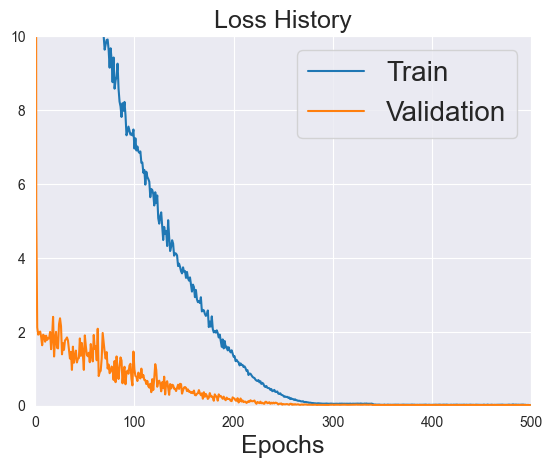

In [9]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 10])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [10]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 720us/step


In [11]:
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 778us/step


In [12]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 234997416.526
Test MSE: 859853925.237


## Proviamo a ridurre il numero di features

In [18]:
st = StandardScaler()
scaled_X_train_reduced = st.fit_transform(X_train[FS_RF])

# Model
model = Sequential()
model.add(Dense(200, input_dim=len(FS_RF), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())

model.fit(x=scaled_X_train_reduced, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 0s 1ms/step - loss: 97.3522
Epoch 2/500
74/74 [==============================] - 0s 1ms/step - loss: 12.1310
Epoch 3/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1706
Epoch 4/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 5/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1582
Epoch 6/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1519
Epoch 7/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 8/500
74/74 [==============================] - 0s 952us/step - loss: 0.1061
Epoch 9/500
74/74 [==============================] - 0s 960us/step - loss: 0.0874
Epoch 10/500
74/74 [==============================] - 0s 952us/step - loss: 0.0750
Epoch 11/500
74/74 [==============================] - 0s 959us/step - loss: 0.0678
Epoch 12/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0638
Epoch 13/500
74/74 [=======

In [19]:
model.evaluate(scaled_X_train_reduced, Y_train)
train_pre = model.predict(scaled_X_train_reduced)

74/74 [==============================] - 0s 644us/step


In [20]:
scaled_X_test_reduced = st.transform(X_test[FS_RF])
model.evaluate(scaled_X_test_reduced, Y_test)
test_pre = model.predict(scaled_X_test_reduced)

19/19 [==============================] - 0s 778us/step


In [21]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 17394332.151
Test MSE: 571667469.361


Text(0, 0.5, 'Sale_Price')

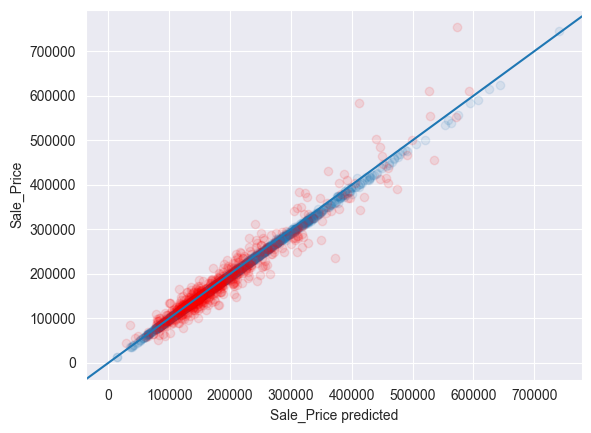

In [22]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')